In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Datasets/CSV and Excel files/tiktok_dataset.csv")
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
pd.set_option("display.max_columns", 10)
pd.set_option("display.max_rows", 1000)


In [ ]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,...,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,...,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,...,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,...,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,...,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,...,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
df.set_index("#", inplace=True)

In [ ]:
df.columns = df.columns.str.replace("_", " ")
df.columns = df.columns.str.title()

df.head()

,Claim Status,Video Id,Video Duration Sec,Video Transcription Text,Verified Status,...,Video View Count,Video Like Count,Video Share Count,Video Download Count,Video Comment Count
#,,,,,,,,,,,
1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,...,343296.0,19425.0,241.0,1.0,0.0
2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,...,140877.0,77355.0,19034.0,1161.0,684.0
3,claim,9859838091,31,someone shared with me that american industria...,not verified,...,902185.0,97690.0,2858.0,833.0,329.0
4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,...,437506.0,239954.0,34812.0,1234.0,584.0
5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,...,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
df.drop(["Video Id", "Video Transcription Text"], axis=1, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True, keep="first")

df.head()

,Claim Status,Video Duration Sec,Verified Status,Author Ban Status,Video View Count,Video Like Count,Video Share Count,Video Download Count,Video Comment Count
#,,,,,,,,,
1,claim,59,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
2,claim,32,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
3,claim,31,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
4,claim,25,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
5,claim,19,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [ ]:
df = df.astype({"Video View Count": "int64", "Video Like Count": "int64", "Video Share Count": "int64", "Video Download Count": "int64", "Video Comment Count": "int64"})

In [ ]:
df.dtypes

,0
Claim Status,object
Video Duration Sec,int64
Verified Status,object
Author Ban Status,object
Video View Count,int64
Video Like Count,int64
Video Share Count,int64
Video Download Count,int64
Video Comment Count,int64


SUMMARY STATISTICS

Creating a summary of the main metrics



In [ ]:
summaryStats = df.describe(include="int64")
summaryStats.index = summaryStats.index.str.capitalize()
summaryStats = summaryStats.round(2)
summaryStats

,Video Duration Sec,Video View Count,Video Like Count,Video Share Count,Video Download Count,Video Comment Count
Count,19084.00,19084.00,19084.00,19084.00,19084.00,19084.00
Mean,32.42,254708.56,84304.64,16735.25,1049.43,349.31
Std,16.23,322893.28,133420.55,32036.17,2004.30,799.64
Min,5.00,20.00,0.00,0.00,0.00,0.00
25%,18.00,4942.50,810.75,115.00,7.00,1.00
50%,32.00,9954.50,3403.50,717.00,46.00,9.00
75%,47.00,504327.00,125020.00,18222.00,1156.25,292.00
Max,60.00,999817.00,657830.00,256130.00,14994.00,9599.00


# EXPLORATORY DATA ANALYSIS

### Do longer / shorter claim videos get more likes per second? (active/under review)



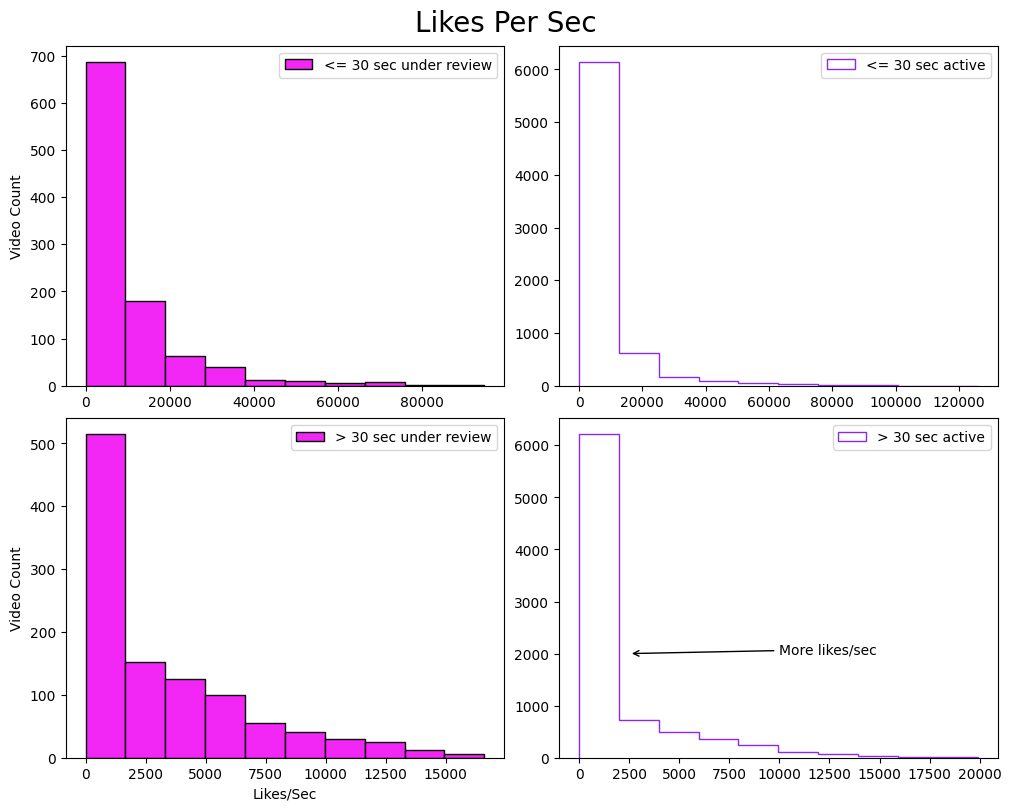

In [ ]:
df["Likes Per Second"] = df["Video Like Count"] / df["Video Duration Sec"]

videoDurationLess30SecLikesPerSecBan = df[(df["Video Duration Sec"] <= 30) & (df["Author Ban Status"] == "under review")]["Likes Per Second"].values
videoDurationLess30SecLikesPerSecActive = df[(df["Video Duration Sec"] <= 30) & (df["Author Ban Status"] == "active")]["Likes Per Second"].values

videoDurationMore30SecLikesPerSecBan = df[(df["Video Duration Sec"] > 30) & (df["Author Ban Status"] == "under review")]["Likes Per Second"].values
videoDurationMore30SecLikesPerSecActive = df[(df["Video Duration Sec"] > 30) & (df["Author Ban Status"] == "active")]["Likes Per Second"].values

fig, axes = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(10, 8))

axes[0, 0].hist(videoDurationLess30SecLikesPerSecBan, label="<= 30 sec under review",
                histtype="bar", color="#F227F5", edgecolor="black")
axes[0, 0].legend()
axes[0, 0].set_ylabel("Video Count")

axes[0, 1].hist(videoDurationLess30SecLikesPerSecActive, label="<= 30 sec active",
                histtype="step", color="#8B27F5")
axes[0, 1].legend()

axes[1, 0].hist(videoDurationMore30SecLikesPerSecBan, label="> 30 sec under review",
                color="#F227F5", edgecolor="black")
axes[1, 0].legend()
axes[1, 0].set_xlabel("Likes/Sec")
axes[1, 0].set_ylabel("Video Count")

axes[1, 1].hist(videoDurationMore30SecLikesPerSecActive, label="> 30 sec active",
                histtype="step", color="#8B27F5")
axes[1, 1].annotate("More likes/sec", xytext=(10000, 2000), xy=(2500, 2000),
                    arrowprops=dict(arrowstyle="->"))
axes[1, 1].legend()

plt.suptitle("Likes Per Sec", fontsize=20)
plt.show()

### On one chart

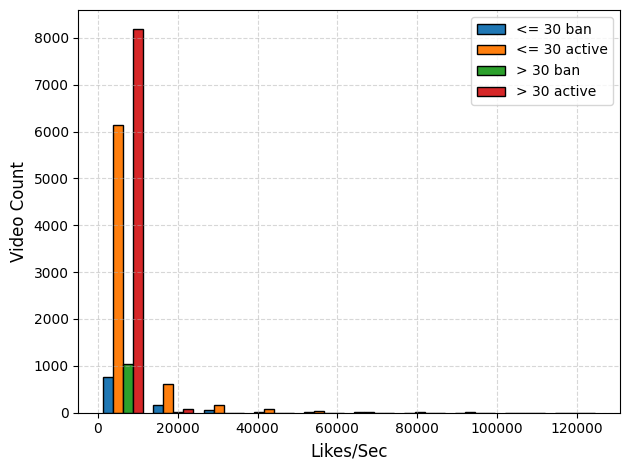

In [ ]:

nBins = 10
xMulti = [videoDurationLess30SecLikesPerSecBan, videoDurationLess30SecLikesPerSecActive,
          videoDurationMore30SecLikesPerSecBan, videoDurationMore30SecLikesPerSecActive]
labels = ["<= 30 ban", "<= 30 active", "> 30 ban", "> 30 active"]

plt.hist(xMulti, histtype="bar", label=labels, edgecolor="black")
plt.xlabel("Likes/Sec", fontsize=12)
plt.ylabel("Video Count", fontsize=12)
plt.tight_layout()
plt.legend()
plt.grid(True, alpha=0.5, linestyle="--")
plt.show()

In [ ]:
df.head()

,Claim Status,Video Duration Sec,Verified Status,Author Ban Status,Video View Count,Video Like Count,Video Share Count,Video Download Count,Video Comment Count,Likes Per Second
#,,,,,,,,,,
1,claim,59,not verified,under review,343296,19425,241,1,0,329.237288
2,claim,32,not verified,active,140877,77355,19034,1161,684,2417.343750
3,claim,31,not verified,active,902185,97690,2858,833,329,3151.290323
4,claim,25,not verified,active,437506,239954,34812,1234,584,9598.160000
5,claim,19,not verified,active,56167,34987,4110,547,152,1841.421053


In [ ]:
df["Claim Status"].unique()

array(['claim', 'opinion'], dtype=object)

###Basic stats & distributions
Distribution of video duration per sec

like ratio = likes / views

comment ratio = comments / views

share ratio = shares / views

Text(0.2, 0.5, 'Avg. Share Ratio: 5.49%')

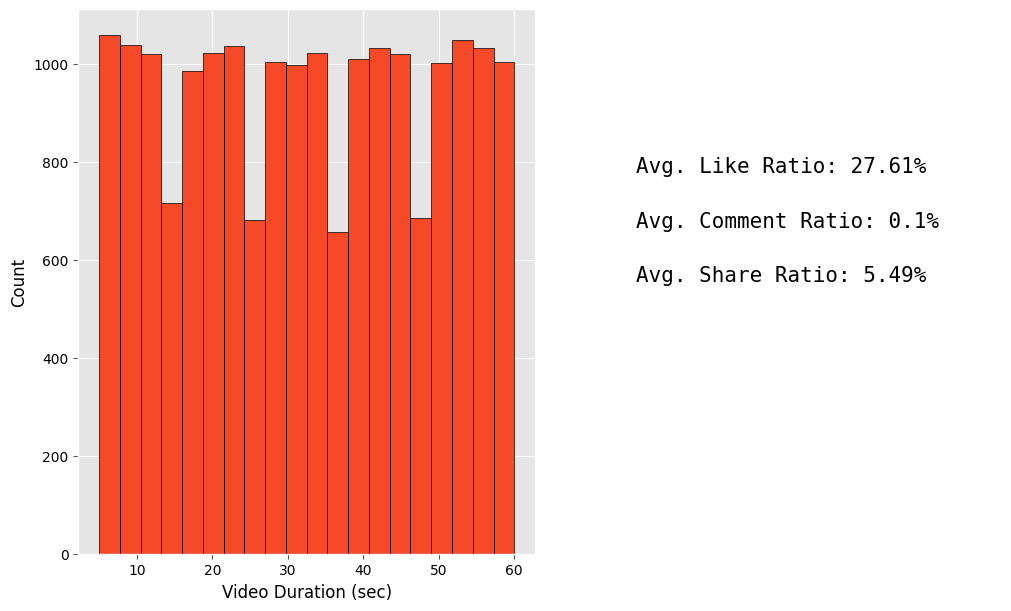

In [ ]:
# Basic stats & distributions
# Distribution of video_duration_sec (histogram, KDE).
# like_ratio = likes / views
# comment_ratio = comments / views
# share_ratio = shares / views

plt.style.use("ggplot")

videoDurations = df["Video Duration Sec"].values
meanLikeRatio = ((df["Video Like Count"].values / df["Video View Count"].values) * 100).mean()
meanCommentRatioPerc = ((df["Video Comment Count"].values / df["Video View Count"].values) * 100).mean()
meanShareRatioPerc = ((df["Video Share Count"] / df["Video View Count"].values) * 100).mean()

fig, axes = plt.subplots(nrows=1, ncols=2, constrained_layout=True,
                         figsize=(10, 6))

axes[0].hist(videoDurations, align="mid", bins=20, edgecolor="black", color="#F54927")
axes[0].set_xlabel("Video Duration (sec)", color="black")
axes[0].set_ylabel("Count", color="black")
axes[0].tick_params(axis="both", labelcolor="black")

axes[1].axis("off")
axes[1].text(x=0.2, y=0.7, s=f"Avg. Like Ratio: {np.round(meanLikeRatio, 2)}%", fontsize=15, color="black", fontfamily="monospace")
axes[1].text(x=0.2, y=0.6, s=f"Avg. Comment Ratio: {np.round(meanCommentRatioPerc, 2)}%", fontsize=15, color="black", fontfamily="monospace")
axes[1].text(x=0.2, y=0.5, s=f"Avg. Share Ratio: {np.round(meanShareRatioPerc, 2)}%", fontsize=15, color="black", fontfamily="monospace")

###Average engagement (views, likes, comments) per claim.


<Axes: xlabel='Claim Status'>

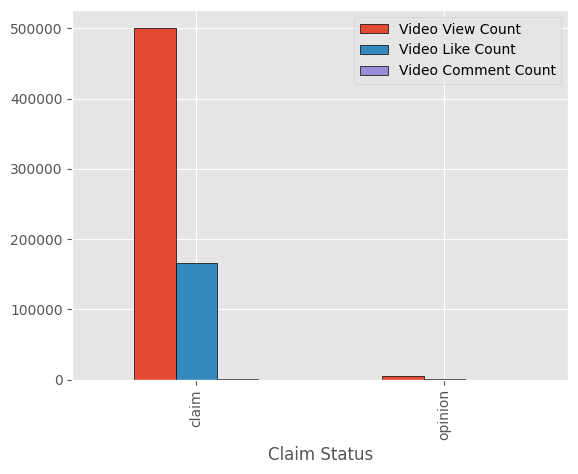

In [ ]:
#Average engagement (views, likes, comments) per claim.
claimGroup = df.groupby("Claim Status").get_group("claim")
opinionGroup = df.groupby("Claim Status").get_group("opinion")

metrics = df.groupby("Claim Status").agg({"Video View Count": "mean", "Video Like Count": "mean", "Video Comment Count": "mean"})
metrics.rename(columns={"Video View Count": "Avg. View Count", "Video Like Count": "Avg. Like Count", "Video Comment Count": "Avg. Comment Count"})

metrics.plot.bar(edgecolor="black")

In [ ]:
df.columns

Index(['Claim Status', 'Video Duration Sec', 'Verified Status',
       'Author Ban Status', 'Video View Count', 'Video Like Count',
       'Video Share Count', 'Video Download Count', 'Video Comment Count',
       'Likes Per Second'],
      dtype='object')

###Boxplots of engagement grouped by verified status


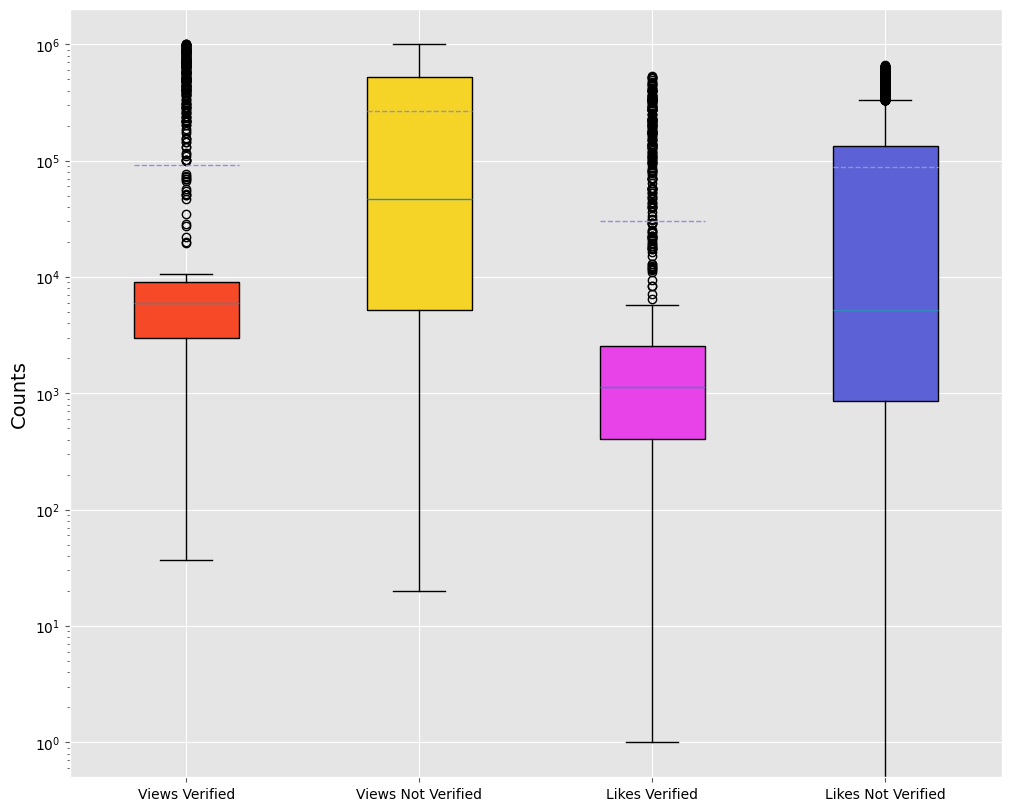

In [ ]:
colors = ["#F54927", "#F5D327", "#E843E8", "#5C62D6"]
labels = ["Views Verified", "Views Not Verified", "Likes Verified",
          "Likes Not Verified"]

viewCountsVerified = df.groupby("Verified Status").get_group("verified")["Video View Count"].values
viewCountsNotVerified = df.groupby("Verified Status").get_group("not verified")["Video View Count"].values

likeCountsVerified = df.groupby("Verified Status").get_group("verified")["Video Like Count"].values
likeCountsNotVerified = df.groupby("Verified Status").get_group("not verified")["Video Like Count"].values

fig, axes = plt.subplots(nrows=1, ncols=1, constrained_layout=True,
                         figsize=(10, 8))

bplot = axes.boxplot([viewCountsVerified, viewCountsNotVerified, likeCountsVerified,
              likeCountsNotVerified], tick_labels=labels, patch_artist=True,
             showmeans=True, meanline=True, orientation="vertical")

axes.set_yscale("log")
axes.set_ylabel("Counts", fontsize=14, color="black")
axes.tick_params(axis="both", labelcolor="black", labelsize=10,
                 rotation=0)

for patch, color in zip(bplot["boxes"], colors):
  patch.set_facecolor(color)

### Linear Regression Model: predicting video like count based on views


R2 Training Set: 0.651318620871344
F2 Test Set: 0.628890044915658
Intercept: -417.2384877933364
Coefficient: [0.33408096]
Mean Sq. Error: 6499448806.07363


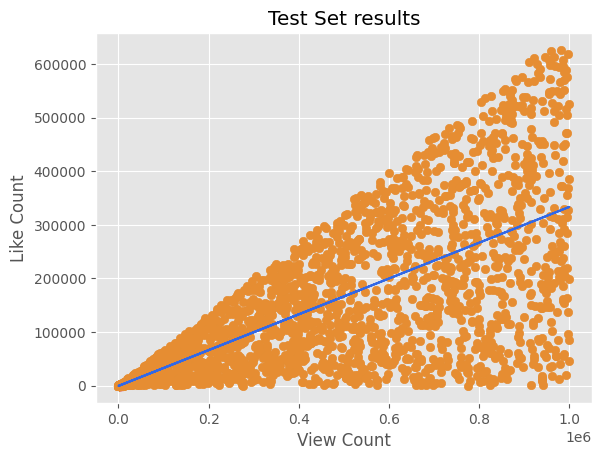

In [ ]:
# predict video like count
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X = df[["Video View Count"]]
y =  df["Video Like Count"]

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(xTrain, yTrain)

yPred = model.predict(xTest)

# metrics
rSqTrain = model.score(xTrain, yTrain)
rSqTest = model.score(xTest, yTest)
print(f"R2 Training Set: {rSqTrain}")
print(f"F2 Test Set: {rSqTest}")
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_}")
print(f"Mean Sq. Error: {mean_squared_error(y_true=yTest, y_pred=yPred)}")

# plot results (training set)
"""
plt.scatter(xTrain, yTrain, color="#E68D32")
plt.plot(xTrain, model.predict(xTrain), color="#3268E6")
plt.title("Training Set results")
plt.xlabel("View Count")
plt.ylabel("Like Count")
plt.show()
"""

# plot results (test set)
plt.scatter(xTest, yTest, color="#E68D32")
plt.plot(xTrain, model.predict(xTrain), color="#3268E6")
plt.title("Test Set results")
plt.xlabel("View Count")
plt.ylabel("Like Count")
plt.show()